In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving storm_tweets.txt to storm_tweets.txt
User uploaded file "storm_tweets.txt" with length 2454 bytes


In [11]:
import nltk
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import pandas as pd
from nltk.stem import PorterStemmer
import pprint as pp
nltk.download('punkt')
nltk.download('stopwords')

def remove_stopwords_and_punctuation(text_data):
    tokens = nltk.word_tokenize(text_data)
    token_punc_removed = list(filter(lambda word: word not in "\//:@()/!#'&,--.';``''", tokens))
    #token_stopwords_removed = list(filter(lambda word: word not in set(stopwords.words('english')), token_punc_removed))
    token_stopwords_removed = [word for word in token_punc_removed if word not in stopwords.words('english')]
    norm_tokens = [word.lower() for word in token_stopwords_removed]
    return " ".join(norm_tokens)

def count_words(text_data):
    k = 0
    w = word_tokenize(text_data)
    for word in w:
        k += 1
    return k

def wrd_frq_dict(tweet,cutoff = 0):
    i = 0
    freq_dict = {}
    words = word_tokenize(tweet)
    for word in words:
        if word == 'the':
            continue
        if tweet.count(word) > cutoff: freq_dict[word] = tweet.count(word)
    return freq_dict


def wrd_in_docs(words,tweets):
    freq_dict = {}
    for word in words:
        i = 0
        if word == 'the':
            continue
        for tweet in tweets:
            if word in tweet: i += 1 
        freq_dict[word] = i
    return freq_dict


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
file_handle = open('storm_tweets.txt') # text file containing more than 200 words
storm_tweets = file_handle.read().splitlines()
storm_tweets = list(filter(None, storm_tweets))
pp.pprint(storm_tweets)

['#StormCallum is coming on Thursday night or Friday morning. Severe gales - '
 'especially for coastal counties. High tides could cause coastal flooding. '
 'Gusts up to 130km/h - 80mph in exposed areas.',
 'Breaking Weather: #StormCallum has been officially named by Met Eireann & '
 'already carries a status orange warning level for Western, Southern & '
 "Eastern counties. Here's your very latest outlook; stay tuned for updates.",
 'Friday  weather system has been named as #StormCallum by @MetEireann The '
 'strongest winds are likely in western Ireland though NW parts of the UK can '
 'expect severe gales. The main impacts for the UK will be from heavy rain '
 'across some western areas Friday & Saturday #weatheraware',
 '#StormCallum UPDATE!! The latest ECMWF forecast model has now shifted the '
 'storm track further east, indicating that a greater swathe of the country is '
 'now at risk of seeing damaging winds on Thursday night and Friday. Gusts in '
 'excess of 160 km/h seem l

In [14]:
i = 0
tweets_frq_dict = []
total_words_per_doc ={}
pre_processed_tweets = []

for tweet in storm_tweets:    
    i += 1
    cleaned_tweet = remove_stopwords_and_punctuation(tweet)
    cleaned_tweet = cleaned_tweet.replace('the', '').replace("'s",'')
    pre_processed_tweets.append(cleaned_tweet)
    total_words_per_doc[i] = count_words(cleaned_tweet)
    tweets_frq_dict.append(wrd_frq_dict(cleaned_tweet))

tweets_frq_dict[0]

{'130km/h': 1,
 '80mph': 1,
 'areas': 1,
 'cause': 1,
 'coastal': 2,
 'coming': 1,
 'could': 1,
 'counties': 1,
 'especially': 1,
 'exposed': 1,
 'flooding': 1,
 'friday': 1,
 'gales': 1,
 'gusts': 1,
 'high': 1,
 'morning': 1,
 'night': 1,
 'severe': 1,
 'stormcallum': 1,
 'thursday': 1,
 'tides': 1}

In [0]:

def calcTF(tweets_frq_dict,total_words_per_doc):
    tf_tweets = []
    for tweet in tweets_frq_dict:
        tf_score_dict = {}
        total_count = total_words_per_doc[tweet] 
        for word in tweets_frq_dict[tweet]:
            tf_score_dict[word] = tweets_frq_dict[tweet][word]/total_count
        tf_tweets.append(tf_score_dict)
    return tf_tweets

import math
def calcIDF(tweets_frq_dict,storm_tweets):
    total_no_tweets = len(storm_tweets)
    idf_score_dict = {}
    for tweet in tweets_frq_dict:
        for word in tweets_frq_dict[tweet]:
            wrd_in_tweets = 0
            for tweet in storm_tweets:   
                if word in tweet.lower():
                    wrd_in_tweets += 1
            idf_score_dict[word] = math.log10(total_no_tweets/wrd_in_tweets)        
    return idf_score_dict

def calcTFIDF(tf_score_list,idf_score_dict):
    tfidf_score_list = []
    for tf_score_dict in tf_score_list:
        tfidf_score_dict = {}
        for word,val in tf_score_dict.items():
            tfidf_score_dict[word] = val * idf_score_dict[word]
        tfidf_score_list.append(tfidf_score_dict)
    return tfidf_score_list




In [0]:
tf_score_list = calcTF(tweets_frq_dict,total_words_per_doc)
tf_score_df = pd.DataFrame.from_dict(tf_score_dict).fillna(0)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(tf_score_df)

In [0]:

tf_score_df = tf_score_df.append(pd.Series(tf_score_df.sum(),name='Total'))

tf_score_df

,'s,10pm,130km/h,160,2,58,70mph,80mph,90mph,a,...,warnings,weather,weatheraware,week,west,western,wind,winds,windstorm,worst
0,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.00,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.00,0.041667,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.00,0.064516,0.032258,0.000000,0.000000,0.064516,0.000000,0.032258,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.00,0.000000,0.000000,0.000000,0.035714,0.000000,0.000000,0.035714,0.000000,0.035714
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.00,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,0.000000,0.000000,0.00,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000
8,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.75,...,0.00,0.041667,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.035714,0.000000,0.000000,0.000000,0.035714,0.000000,0.035714,0.035714,0.035714,0.00,...,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.035714,0.000000


In [0]:
tf_score_dict = dict(tf_score_df.loc['Total'])
print(tf_score_dict)          
del tf_score_dict['the']
del tf_score_dict['a']
del tf_score_dict["'s"]

{"'s": 0.077380952380952384, '10pm': 0.041666666666666664, '130km/h': 0.047619047619047616, '160': 0.035714285714285712, '2': 0.035714285714285712, '58': 0.038461538461538464, '70mph': 0.035714285714285712, '80mph': 0.083333333333333329, '90mph': 0.035714285714285712, 'a': 0.75, 'across': 0.032258064516129031, 'advanced': 0.050000000000000003, 'ahead': 0.041666666666666664, 'already': 0.091666666666666674, 'areas': 0.11559139784946236, 'arrival': 0.041666666666666664, 'atlantic': 0.083333333333333329, 'become': 0.035714285714285712, 'blustery': 0.050000000000000003, 'breaking': 0.041666666666666664, 'bringing': 0.035714285714285712, 'callum': 0.083333333333333329, 'canada': 0.047619047619047616, 'captured': 0.038461538461538464, 'carried': 0.047619047619047616, 'carries': 0.041666666666666664, 'cat3': 0.035714285714285712, 'cat4': 0.035714285714285712, 'category': 0.035714285714285712, 'cause': 0.047619047619047616, 'center': 0.035714285714285712, 'chance': 0.035714285714285712, 'close

In [0]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud 

def generate_wordcloud(tf_score_dict):
    wordcloud = WordCloud(relative_scaling = 0.6).generate_from_frequencies(tf_score_dict)
    plt.figure(figsize=(200,50))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

generate_wordcloud(tf_score_dict)

In [0]:
idf_score_dict = calcIDF(tweets_frq_dict,storm_tweets)
tfidf_score = calcTFIDF(tf_score_list,idf_score_dict)
tfidf_score = pd.DataFrame.from_dict(tfidf_score).fillna(0)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(tfidf_score)

         's      10pm   130km/h       160         2        58     70mph  \
0  0.000000  0.000000  0.047619  0.000000  0.000000  0.000000  0.000000   
1  0.029124  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3  0.000000  0.000000  0.000000  0.035714  0.000000  0.000000  0.000000   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6  0.000000  0.000000  0.000000  0.000000  0.000000  0.038462  0.000000   
7  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8  0.000000  0.041667  0.000000  0.000000  0.000000  0.000000  0.000000   
9  0.024963  0.000000  0.000000  0.000000  0.024963  0.000000  0.035714   

      80mph     90mph    a    across  advanced     ahead   already     areas  \
0  0.033284  0.000000  0.0  0.000000      0.00  0.000000  0.000000  0.024899   
1  0.000000  0

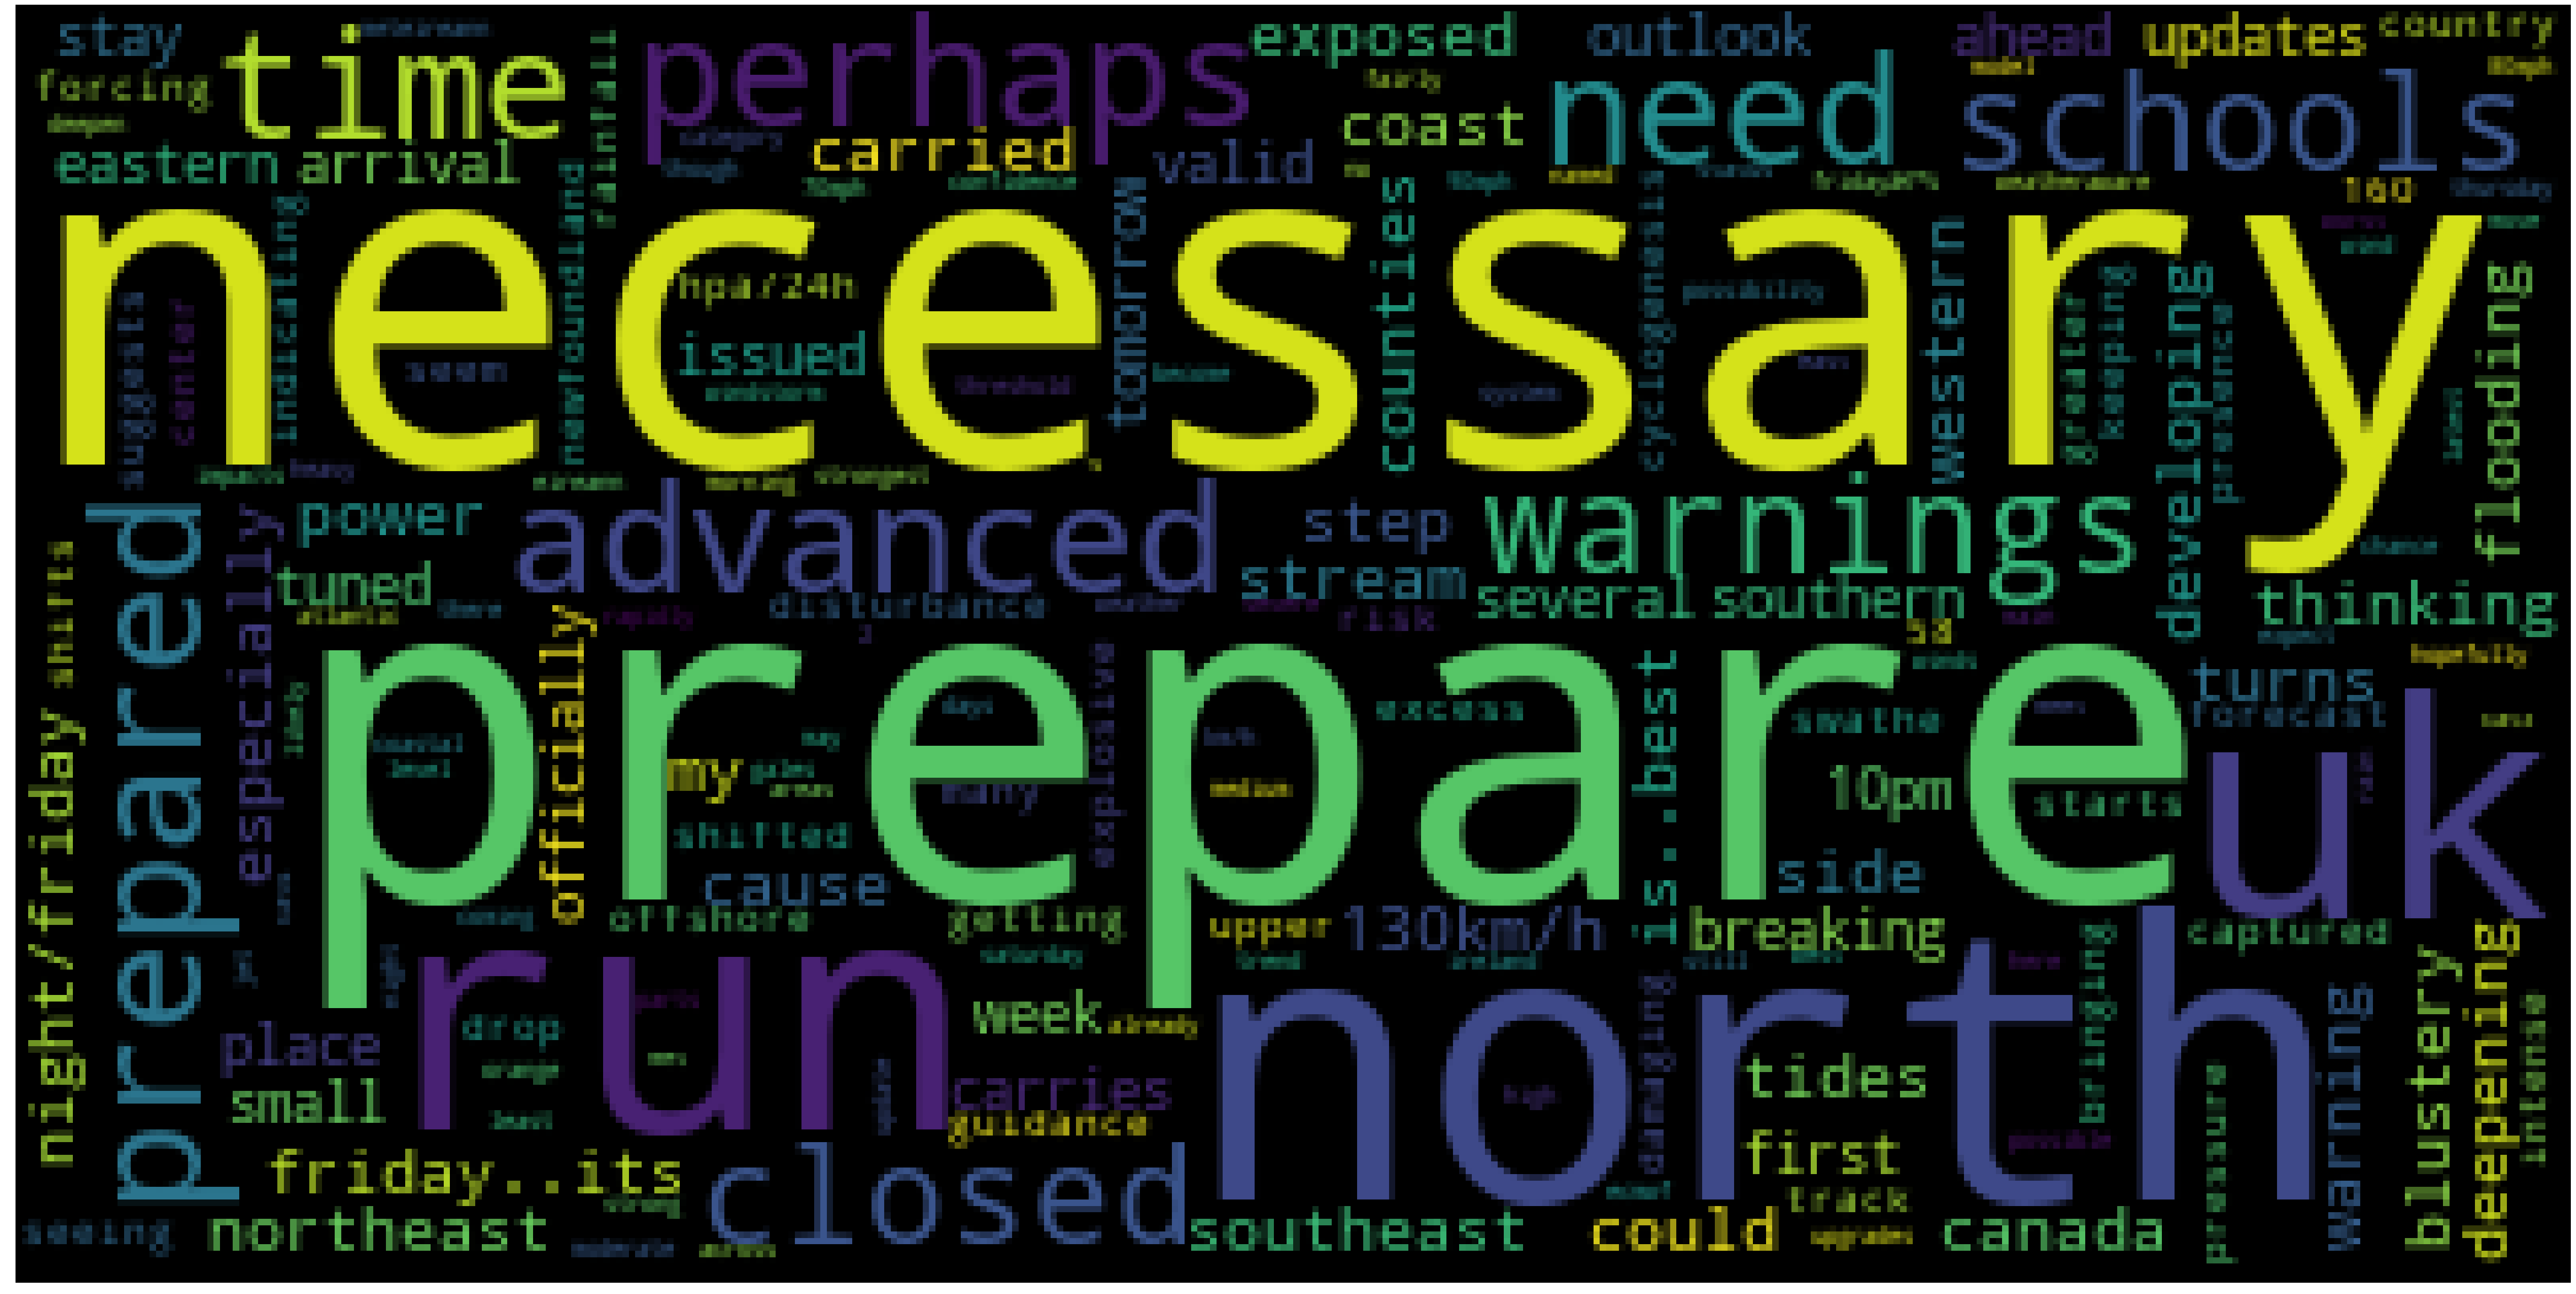

In [0]:
generate_wordcloud(tfidf_score)

### PMI Scores Calculations 

#### Computing Term Probabilities

In [0]:
import math
import operator 
from collections import Counter
from collections import defaultdict
# remember to include the other import from the previous post

# co-occurrence matrix
com = defaultdict(lambda : defaultdict(int))

terms_only = []
pre_processed_tweets_1 = ' '.join(pre_processed_tweets)
terms_only = word_tokenize(pre_processed_tweets_1)

# Build co-occurrence matrix
for i in range(len(terms_only)-1):            
    for j in range(i+1, len(terms_only)):
        w1, w2 = sorted([terms_only[i], terms_only[j]])                
        if w1 != w2:
            com[w1][w2] += 1

print(com)

defaultdict(<function <lambda> at 0x0000025A02C6BAE8>, {'coming': defaultdict(<class 'int'>, {'stormcallum': 18, 'thursday': 4, 'night/friday': 2, 'morning': 4, 'severe': 4, 'gales': 4, 'especially': 2, 'counties': 8, 'high': 4, 'tides': 2, 'could': 2, 'flooding': 2, 'gusts': 10, 'exposed': 2, 'wear': 6, 'officially': 2, 'named': 4, 'met': 2, 'eireann': 2, 'status': 4, 'orange': 4, 'warning': 6, 'level': 4, 'western': 6, 'sourn': 2, 'eastern': 2, 'here': 2, 'latest': 8, 'outlook': 2, 'stay': 2, 'tuned': 2, 'updates': 2, 'fridayâ€™s': 2, 'system': 2, 'meteireann': 2, 'strongest': 4, 'winds': 6, 'likely': 4, 'ireland': 4, 'though': 2, 'nw': 2, 'parts': 2, 'uk': 4, 'expect': 2, 'main': 2, 'impacts': 2, 'heavy': 2, 'rain': 2, 'friday': 8, 'saturday': 2, 'wearaware': 2, 'update': 2, 'ecmwf': 6, 'forecast': 2, 'model': 4, 'shifted': 2, 'storm': 4, 'track': 2, 'east': 2, 'indicating': 2, 'greater': 2, 'swa': 2, 'country': 2, 'risk': 2, 'seeing': 2, 'damaging': 2, 'night': 2, 'excess': 2, 'km/

In [0]:
com_max = []
# For each term, look for the most common co-occurrent terms
for t1 in com:
    t1_max_terms = sorted(com[t1].items(), key=operator.itemgetter(1), reverse=True)[:5]
    for t2, t2_count in t1_max_terms:
        com_max.append(((t1, t2), t2_count))
# Get the most frequent co-occurrences
terms_max = sorted(com_max, key=operator.itemgetter(1), reverse=True)
terms_max

[(('gusts', 'stormcallum'), 45),
 (('counties', 'stormcallum'), 36),
 (('latest', 'stormcallum'), 36),
 (('friday', 'stormcallum'), 36),
 (('stormcallum', 'wear'), 27),
 (('stormcallum', 'warning'), 27),
 (('stormcallum', 'western'), 27),
 (('stormcallum', 'winds'), 27),
 (('stormcallum', 'strong'), 27),
 (('coastal', 'stormcallum'), 27),
 (('areas', 'stormcallum'), 27),
 (('ecmwf', 'stormcallum'), 27),
 (('counties', 'gusts'), 20),
 (('gusts', 'latest'), 20),
 (('friday', 'gusts'), 20),
 (('coming', 'stormcallum'), 18),
 (('morning', 'stormcallum'), 18),
 (('severe', 'stormcallum'), 18),
 (('gales', 'stormcallum'), 18),
 (('high', 'stormcallum'), 18),
 (('80mph', 'stormcallum'), 18),
 (('named', 'stormcallum'), 18),
 (('already', 'stormcallum'), 18),
 (('status', 'stormcallum'), 18),
 (('orange', 'stormcallum'), 18),
 (('level', 'stormcallum'), 18),
 (('likely', 'stormcallum'), 18),
 (('ireland', 'stormcallum'), 18),
 (('model', 'stormcallum'), 18),
 (('storm', 'stormcallum'), 18),
 (

In [0]:


# n_docs is the total n. of tweets
no_tweets = len(pre_processed_tweets)
words = word_tokenize(pre_processed_tweets_1)
count_stop_single = wrd_in_docs(words,pre_processed_tweets)

p_t = {}
p_t_com = defaultdict(lambda : defaultdict(int))
for term, n in count_stop_single.items():
    p_t[term] = n / no_tweets
    for t2 in com[term]:
        p_t_com[term][t2] = com[term][t2] / no_tweets

        
pmi = defaultdict(lambda : defaultdict(int))
for t1 in p_t:
    for t2 in com[t1]:
        denom = p_t[t1] * p_t[t2]
        pmi[t1][t2] = math.log2(p_t_com[t1][t2] / denom)

#tuple list conversion
pmi_pairstuple_list = []
for t1,t2 in pmi.items():
    for word,v in t2.items():
        pmi_pairstuple_list.append(((t1, word), v))
pmi_pairstuple_list


[(('stormcallum', 'thursday'), 3.321928094887362),
 (('stormcallum', 'tides'), 3.321928094887362),
 (('stormcallum', 'wear'), 3.321928094887362),
 (('stormcallum', 'warning'), 3.321928094887362),
 (('stormcallum', 'western'), 3.9068905956085187),
 (('stormcallum', 'tuned'), 3.321928094887362),
 (('stormcallum', 'updates'), 3.321928094887362),
 (('stormcallum', 'system'), 3.321928094887362),
 (('stormcallum', 'strongest'), 3.321928094887362),
 (('stormcallum', 'winds'), 2.9068905956085187),
 (('stormcallum', 'though'), 3.321928094887362),
 (('stormcallum', 'uk'), 4.321928094887362),
 (('stormcallum', 'wearaware'), 3.321928094887362),
 (('stormcallum', 'update'), 2.321928094887362),
 (('stormcallum', 'track'), 3.321928094887362),
 (('stormcallum', 'swa'), 3.321928094887362),
 (('stormcallum', 'west'), 2.321928094887362),
 (('stormcallum', 'strong'), 2.9068905956085187),
 (('stormcallum', 'trend'), 3.321928094887362),
 (('stormcallum', 'worst'), 3.321928094887362),
 (('stormcallum', 'stre

In [0]:
def pmi(word1, word2, unigram_freq, bigram_freq):
    prob_word1 = unigram_freq[word1] / float(sum(unigram_freq.values()))
    prob_word2 = unigram_freq[word2] / float(sum(unigram_freq.values()))
    prob_word1_word2 = bigram_freq[" ".join([word1, word2])] / float(sum(bigram_freq.values()))
    return math.log(prob_word1_word2/float(prob_word1*prob_word2),2)

In [0]:
from nltk import ngrams 
terms_bigram = []
for tweet in pre_processed_tweets:
    terms_only = word_tokenize(tweet)    
    terms_bigram.append(bigrams(terms_only))
